## Iris 데이터셋 k-NN 알고리즘으로 분류하기

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### 데이터셋 로드 및 전처리

In [2]:
# 데이터 로드
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 데이터 분포 확인

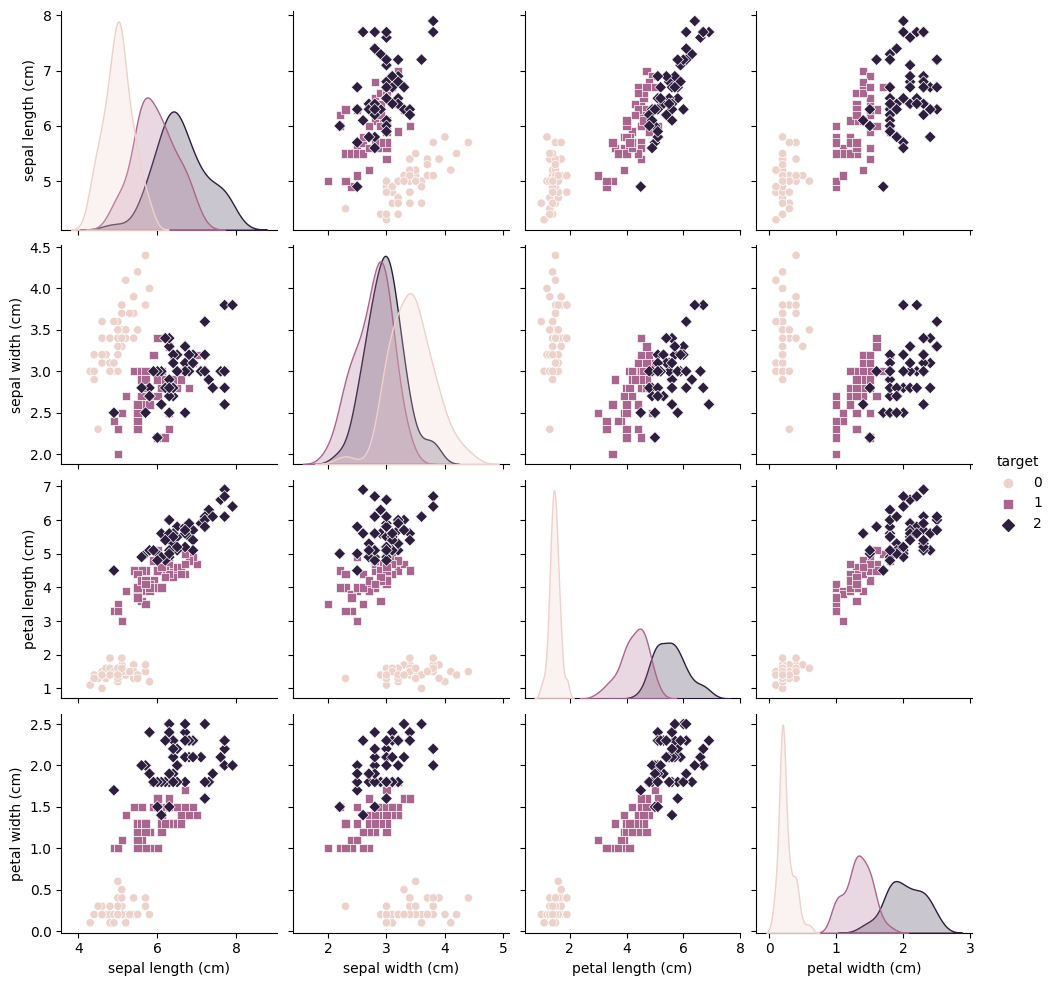

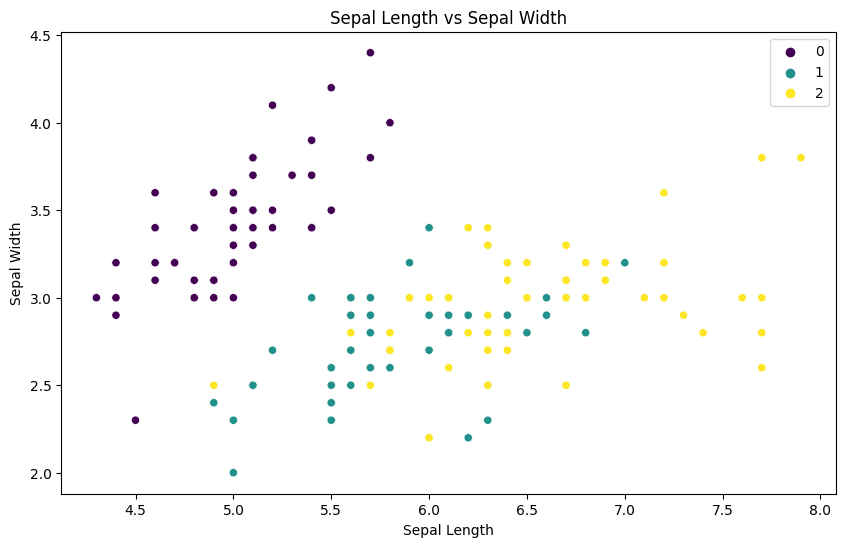

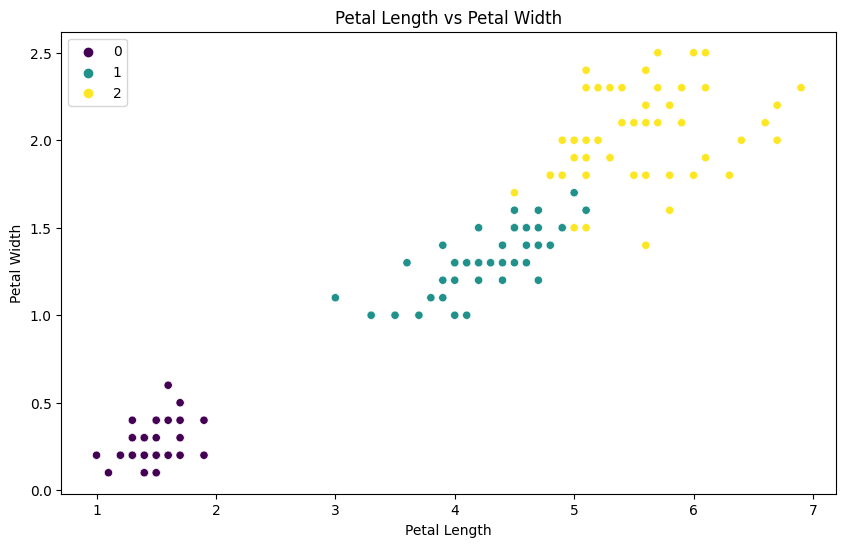

In [3]:
# 산점도 시각화
sns.pairplot(pd.concat([X, y.rename('target')], axis=1), hue='target', markers=["o", "s", "D"])
plt.show()

# Sepal Width와 Sepal Length 간의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=iris.target, palette='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Petal Width와 Petal Length 간의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris.data[:, 2], y=iris.data[:, 3], hue=iris.target, palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

#### 모델 적용

In [4]:
# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 모델 학습 결과 시각화

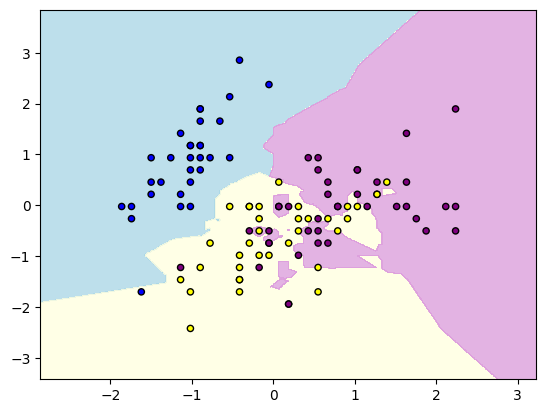

In [12]:
# 학습 결과 시각화
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model_class, **model_params):
    # 모델 학습
    model = model_class(**model_params)
    model.fit(X, y)
    
    # 결정 경계 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'lightyellow', 'plum')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('blue', 'yellow', 'purple')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Feature를 2개만 선택하여 시각화 (예: sepal length와 sepal width)
X_vis = X_train[:, :2]
plot_decision_boundaries(X_vis, y_train, KNeighborsClassifier, n_neighbors=3)